In [ ]:
Rudraksh Singh LAB 12 CV

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical

In [3]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset
!unzip -q face-expression-recognition-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset
License(s): unknown
100% 120M/121M [00:00<00:00, 265MB/s] 
100% 121M/121M [00:00<00:00, 238MB/s]


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = "/content/images/train"
val_dir = "/content/images/validation"

train_gen = ImageDataGenerator(rescale=1./255)
val_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir, target_size=(48, 48), color_mode='grayscale',
    batch_size=64, class_mode='categorical', shuffle=True
)

val_data = val_gen.flow_from_directory(
    val_dir, target_size=(48, 48), color_mode='grayscale',
    batch_size=64, class_mode='categorical', shuffle=False
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(7, activation='softmax')  # 7 emotion classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         819,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 839,047 (3.20 MB)

 Trainable params: 839,047 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
history = model.fit(train_data, validation_data=val_data, epochs=25)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


451/451 ━━━━━━━━━━━━━━━━━━━━ 22s 33ms/step - accuracy: 0.2589 - loss: 1.8008 - val_accuracy: 0.3866 - val_loss: 1.6084
Epoch 2/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.3768 - loss: 1.5968 - val_accuracy: 0.4448 - val_loss: 1.4674
Epoch 3/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4195 - loss: 1.4998 - val_accuracy: 0.4704 - val_loss: 1.3849
Epoch 4/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4440 - loss: 1.4351 - val_accuracy: 0.4834 - val_loss: 1.3602
Epoch 5/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4712 - loss: 1.3838 - val_accuracy: 0.5016 - val_loss: 1.3140
Epoch 6/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4836 - loss: 1.3528 - val_accuracy: 0.5127 - val_loss: 1.2843
Epoch 7/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.4967 - loss: 1.3145 - val_accuracy: 0.5157 - val_loss: 1.2622
Epoch 8/25
451/451 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.4987 - loss: 1.3075 - val_accurac

In [8]:
model.save("/content/emotion_model.h5")

In [9]:
from google.colab import files
uploaded = files.upload()


Saving henry-cavill-june-2023-witcher-3-premiere-659ea231d4463 (1).jpg to henry-cavill-june-2023-witcher-3-premiere-659ea231d4463 (1).jpg


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 583ms/step


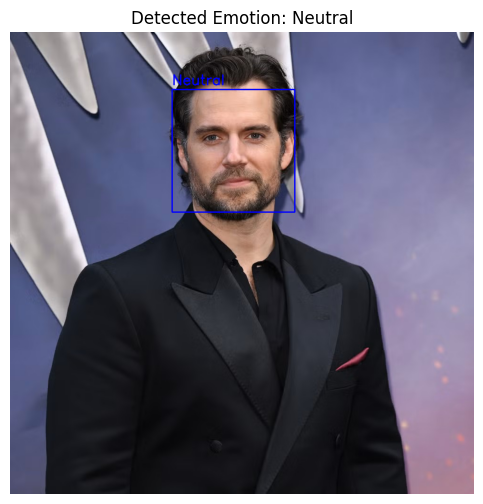

In [10]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

img_path = list(uploaded.keys())[0]
img = cv2.imread(img_path)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

model = load_model("/content/emotion_model.h5")
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

for (x, y, w, h) in faces:
    roi = gray[y:y+h, x:x+w]
    roi = cv2.resize(roi, (48, 48))
    roi = roi.astype('float32') / 255.0
    roi = np.expand_dims(roi, axis=0)
    roi = np.expand_dims(roi, axis=-1)

    prediction = model.predict(roi)
    label = emotion_labels[np.argmax(prediction)]

    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.putText(img, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.title(f"Detected Emotion: {label}")
plt.show()


In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

model = load_model("E:/Downloads/emotion_model.h5")

# Emotion labels
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# OpenCV face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    for (x, y, w, h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_gray = cv2.resize(roi_gray, (48, 48))
        roi = roi_gray.astype("float32") / 255.0
        roi = np.expand_dims(roi, axis=0)
        roi = np.expand_dims(roi, axis=-1)

        preds = model.predict(roi)
        label = emotion_labels[np.argmax(preds)]

        # Draw bounding box and label
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        cv2.putText(frame, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.9, (36, 255, 12), 2)

    cv2.imshow("Facial Emotion Recognition", frame)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

In [3]:
pip install opencv-python pytesseract


Note: you may need to restart the kernel to use updated packages.


In [6]:
import cv2

# Start video capture
cap = cv2.VideoCapture(0)

# video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('grayscale_output.avi', fourcc, 20.0, (640, 480), isColor=False)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    out.write(gray)

    cv2.imshow("Grayscale Video", gray)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Video recording stopped and saved.")
        break

cap.release()
out.release()
cv2.destroyAllWindows()


Video recording stopped and saved.


In [9]:
import cv2

# Initialize video capture
cap = cv2.VideoCapture(0)

# Background subtractor for motion detection
fgbg = cv2.createBackgroundSubtractorMOG2()

while True:
    ret, frame = cap.read()
    if not ret:
        break

    # background subtraction
    fgmask = fgbg.apply(frame)

    # contours of moving objects
    contours, _ = cv2.findContours(fgmask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) < 1000:
            continue  # Ignore small contours

        # Get bounding box of moving objects
        x, y, w, h = cv2.boundingRect(contour)
        # rectangle around moving object
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)

    cv2.imshow("Motion Detection", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("Motion detection stopped.")
        break

cap.release()
cv2.destroyAllWindows()


Motion detection stopped.


In [11]:
import cv2
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe' 

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    #  OCR on the grayscale frame
    text = pytesseract.image_to_string(grqay)
    if text.strip():  # If text is detected
        print(f"Detected Text: {text.strip()}")

    cv2.imshow("Video Feed", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        print("OCR stopped.")
        break

cap.release()
cv2.destroyAllWindows()


Detected Text: 7
Detected Text: a
Detected Text: - y ,
\4
Detected Text: wth cqace@
Detected Text: Wy

x“
"|

| |
Detected Text: | |
Detected Text: tow),
Detected Text: ING II
Detected Text: |

ee
‘

il)
Detected Text: —s
? IN am

fib
tenn vt ht
sane il ten APA
Detected Text: aad anes nee
Detected Text: oor
i
Detected Text: be hy
Detected Text: one,
Detected Text: Ay mango =
Detected Text: Ey

tee
Detected Text: "1
Detected Text: saa
Detected Text: a
Detected Text: -
Detected Text: -

Ti
Detected Text: |
Detected Text: year warvt pt be Giterere. Wt tee Guar.
Detected Text: stan auemrtiemerte ee
omement asehentene
Detected Text: é

|

a is geen happen ome

ionengre.
‘Thés yor:

Nant your weoe’t just be Giterert. WY on Gntant. 7
Detected Text: me
OCR stopped.
